In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import RegularPolygon
import matplotlib as mpl
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
#give the columns occupancy values, save_path and save_name for the plot
col_value = {'0,0': 0.0,
        '0,1': 0.0,
        '-1,0': 0,
        '-1,-1': 0,
        '0,-1': 0.0,
        '1,0': 0.0,
        '1,1': 0.0}
save_path = '/Users/aichah/Desktop/TLI/data/'
save_name = 'test_extended_1.png'

if save_path[-1] != '/':
    save_path += '/'

In [3]:
#These are values not to be changed
r_ = [2,3] # give two numbers for definning the radius

col_coor = {'0,0': [0,0],
            '0,1': [0,2],
            '-1,0': [-1,1],
            '-1,-1': [-1,-1],
            '0,-1': [0,-2],
            '1,1': [1,1],
            '1,0': [1,-1], #until here is the inner ring
            '0,2': [0,4],
            '0,-2': [0,-4],
            '1,2': [1,3],
            '1,-1': [1,-3],
            '2,0': [2,-2]}

data = {'col' : col_coor.keys(),'coor' : col_coor.values()}
col_coor = pd.DataFrame(data=data)
col_coor

,col,coor
0,"0,0","[0, 0]"
1,"0,1","[0, 2]"
2,"-1,0","[-1, 1]"
3,"-1,-1","[-1, -1]"
4,"0,-1","[0, -2]"
5,"1,1","[1, 1]"
6,"1,0","[1, -1]"
7,"0,2","[0, 4]"
8,"0,-2","[0, -4]"
9,"1,2","[1, 3]"


In [4]:
## define the boundaries for the colormap (values and colors)
# color_bound = {0:'blue', 0.5:'yellow', 1:'red'}
# cmap = colors.ListedColormap(color_bound.values())
# norm = colors.BoundaryNorm(list(color_bound.keys()), cmap.N)

vmin, vmax= 0, 1
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
p = plt.get_cmap('hot_r')

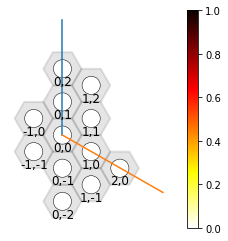

In [5]:
# plotting the column occupancy numbers
# you might  want to change some styling parameters
# the last line is for saving the plot
fig, ax = plt.subplots(1)
ax.set_aspect('equal')

for index, row in col_coor.iterrows():
        coor = row[1]
        X = coor[0]
        Y = r_[0] * np.sin(np.radians(60)) * (coor[1]) /r_[1]
        hexagon = RegularPolygon((X,Y), orientation = np.radians(30), 
                                numVertices=6, radius=r_[0]/r_[1], 
                                facecolor='k',
                                alpha=0.1, 
                                linewidth=2,
                                edgecolor='k')
        try:
                color = p(col_value[row[0]])
        except:
                color = p(0)
        circle = plt.Circle((X,Y), np.sqrt(1/10), 
                                facecolor=color, alpha=1, edgecolor="k", linewidth=0.5)
                                # linewidth=3, edgecolor='k')
        # if row[0] in col_value.keys():
        ax.add_patch(hexagon)
        ax.add_patch(circle)
        # ax.text(X, Y + 0.45, col_value[name], ha ='center',
        #         va ='center', size = 12, color='blue')
        ax.text(X, Y - 0.45, row[0], ha ='center',
                va ='center', size = 12, color='k')
plt.autoscale(enable = True)
sns.despine(left=True, bottom=True)
plt.tick_params(# axis='x', # changes apply to the x-axis
                which='both', # both major and minor ticks are affected
                bottom=False, # ticks along the bottom edge are off
                left=False,
                labelbottom=False,
                labelleft=False) # labels along the bottom edge are off
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=p), ax=ax)
plt.plot([0,0], [0,4])
plt.plot([0,3.5], [0,-2])
### saving the plot
plt.savefig(save_path+save_name, bbox_inches='tight')